# Sentiment Analysis - Ethiopian Banking Apps
## Task 2: Quantifying User Sentiment with DistilBERT

### 📋 Business Objective
Analyze customer sentiment across three Ethiopian banking apps to identify satisfaction drivers and pain points.

**Banks Analyzed:**
- Commercial Bank of Ethiopia (CBE)
- Bank of Abyssinia (BOA) 
- Dashen Bank

**Methodology:**
- Use `distilbert-base-uncased-finetuned-sst-2-english` for high-accuracy sentiment classification
- Convert binary sentiment to 3-class system (POSITIVE/NEUTRAL/NEGATIVE)
- Aggregate results by bank and star rating
- Generate actionable insights for product improvement

### 🎯 Key Questions
1. Which bank has the most positive/negative sentiment?
2. How does sentiment correlate with star ratings?
3. What are the sentiment patterns across different banks?
4. Are there specific issues driving negative sentiment?

In [2]:
# Cell 1: Setup and Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from transformers import pipeline
import torch
from tqdm import tqdm

# Add project root to path to import custom modules
sys.path.append('..')

# Import configuration
from config import DATA_PATHS

# Import custom sentiment analyzer
from scripts.sentiment_analyzer import SentimentAnalyzer
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tqdm')

# Setup plotting for professional visuals
plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")
%matplotlib inline

print(" Libraries and modules imported successfully!")
print(f"📁 Data paths configured: {DATA_PATHS['processed_reviews']}")

 Libraries and modules imported successfully!
📁 Data paths configured: data/processed/reviews_cleaned.csv


In [3]:
# Cell 2: Load and Prepare Data
print("📥 Loading Task 1 Processed Data...")

try:
    # Load the cleaned reviews from Task 1
    df = pd.read_csv(DATA_PATHS['processed_reviews'])
    print(f" Successfully loaded {len(df):,} reviews")
    
    # Add unique review IDs for tracking
    if 'review_id' not in df.columns:
        df['review_id'] = [f"REVIEW_{i:04d}" for i in range(1, len(df)+1)]
        print("📝 Added unique review IDs")
    
    # Display data overview
    print(f"\n📊 Dataset Overview:")
    print(f"   Total Reviews: {len(df):,}")
    print(f"   Banks: {', '.join(df['bank'].unique())}")
    print(f"   Date Range: {df['date'].min()} to {df['date'].max()}")
    
    # Show rating distribution
    rating_dist = df['rating'].value_counts().sort_index(ascending=False)
    print(f"\n⭐ Rating Distribution:")
    for rating, count in rating_dist.items():
        percentage = (count / len(df)) * 100
        print(f"   {rating} stars: {count} reviews ({percentage:.1f}%)")
    
    # Display sample data
    print("\n Data Sample:")
    display(df[['review_id', 'bank', 'rating', 'review', 'date']].head(3))
    
except Exception as e:
    print(f" Error loading data: {e}")
    raise

📥 Loading Task 1 Processed Data...
 Successfully loaded 1,244 reviews
📝 Added unique review IDs

📊 Dataset Overview:
   Total Reviews: 1,244
   Banks: Commercial Bank of Ethiopia, Bank of Abyssinia, Dashen Bank
   Date Range: 2022-11-27 to 2025-11-28

⭐ Rating Distribution:
   5 stars: 747 reviews (60.0%)
   4 stars: 105 reviews (8.4%)
   3 stars: 81 reviews (6.5%)
   2 stars: 42 reviews (3.4%)
   1 stars: 269 reviews (21.6%)

 Data Sample:


,review_id,bank,rating,review,date
0,REVIEW_0001,Commercial Bank of Ethiopia,5,good app,2025-11-28
1,REVIEW_0002,Commercial Bank of Ethiopia,5,This application is very important and advanta...,2025-11-27
2,REVIEW_0003,Commercial Bank of Ethiopia,1,why didn't work this app?,2025-11-27


In [4]:
# Cell 3: Initialize Sentiment Analyzer
print("🤖 Initializing DistilBERT Sentiment Analysis Pipeline...")

try:
    sentiment_analyzer = SentimentAnalyzer()
    print(" DistilBERT model loaded successfully!")
    print("   Model: distilbert-base-uncased-finetuned-sst-2-english")
    print("   Task: Sentiment Analysis (Positive/Negative)")
    print("   Device:", "GPU" if torch.cuda.is_available() else "CPU")
    
except Exception as e:
    print(f" Error initializing sentiment analyzer: {e}")
    raise

🤖 Initializing DistilBERT Sentiment Analysis Pipeline...
🤖 Loading DistilBERT sentiment model...


Device set to use cpu


 DistilBERT model loaded successfully!
   Model: distilbert-base-uncased-finetuned-sst-2-english
   Task: Sentiment Analysis (Positive/Negative)
   Device: CPU


In [5]:
# Cell 4: Perform Sentiment Analysis
print("🎯 Analyzing Sentiment for All Reviews...")

# Perform sentiment analysis
df_sentiment = sentiment_analyzer.add_sentiment_to_dataframe(df)

print(" Sentiment Analysis Completed!")
print(f"📊 Results Summary:")
print(f"   Total reviews processed: {len(df_sentiment):,}")
print(f"   Success rate: {(sentiment_analyzer.stats['analyzed_reviews'] / sentiment_analyzer.stats['total_reviews']) * 100:.1f}%")

# Display sentiment distribution
sentiment_counts = df_sentiment['sentiment_label'].value_counts()
print(f"\n😊 Sentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df_sentiment)) * 100
    print(f"   {sentiment}: {count} reviews ({percentage:.1f}%)")

# Show sample with sentiment
print("\n Sample Reviews with Sentiment Analysis:")
sample_display = df_sentiment[['review_id', 'bank', 'rating', 'review', 'sentiment_label', 'sentiment_score']].head(5)
display(sample_display)

🎯 Analyzing Sentiment for All Reviews...
🎯 Starting sentiment analysis...


Analyzing Sentiment: 100%|██████████| 39/39 [02:43<00:00,  4.19s/it]

 Sentiment Analysis Completed!
📊 Results Summary:
   Total reviews processed: 1,244
   Success rate: 100.0%

😊 Sentiment Distribution:
   POSITIVE: 753 reviews (60.5%)
   NEGATIVE: 482 reviews (38.7%)
   NEUTRAL: 9 reviews (0.7%)

 Sample Reviews with Sentiment Analysis:


,review_id,bank,rating,review,sentiment_label,sentiment_score
0,REVIEW_0001,Commercial Bank of Ethiopia,5,good app,POSITIVE,0.999849
1,REVIEW_0002,Commercial Bank of Ethiopia,5,This application is very important and advanta...,POSITIVE,0.998468
2,REVIEW_0003,Commercial Bank of Ethiopia,1,why didn't work this app?,NEGATIVE,0.999132
3,REVIEW_0004,Commercial Bank of Ethiopia,5,The app makes our life easier. Thank you CBE!,POSITIVE,0.999696
4,REVIEW_0005,Commercial Bank of Ethiopia,1,this app very bad 👎,NEGATIVE,0.999797


📊 Creating Comprehensive Sentiment Visualizations...


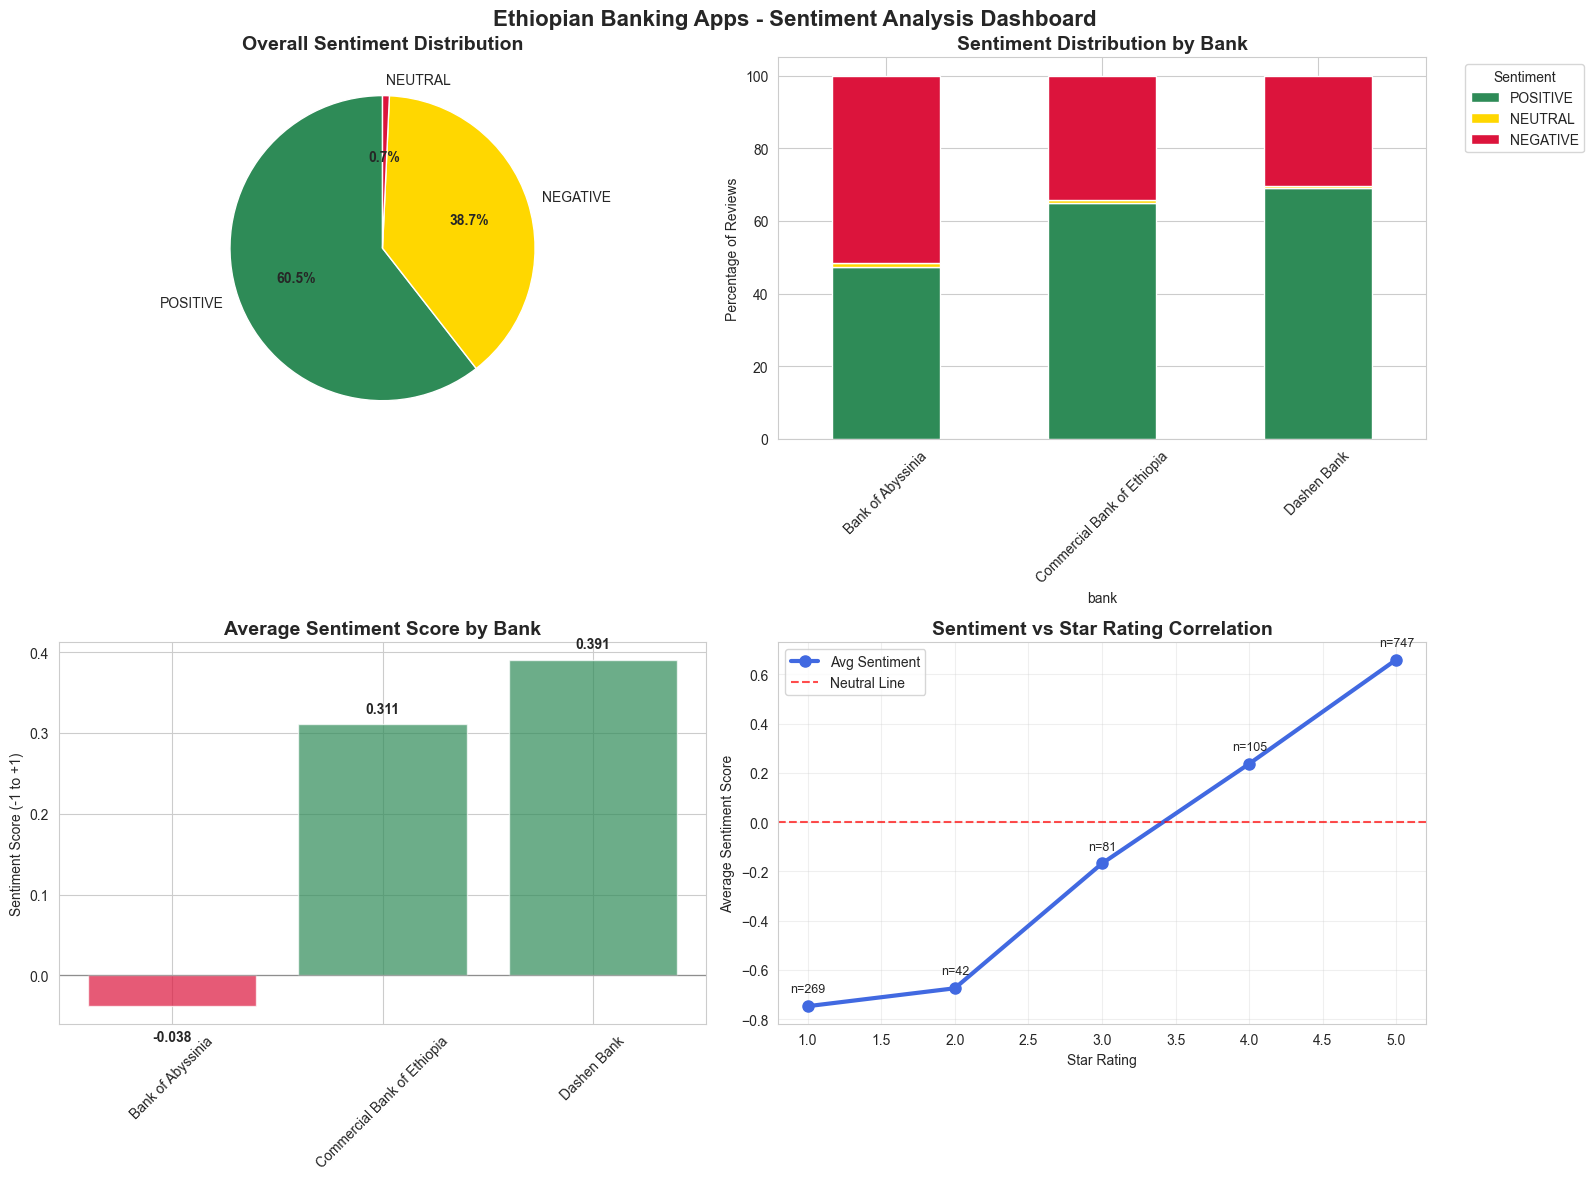

 Visualizations created successfully!


In [6]:
# Cell 5: Comprehensive Sentiment Visualization
print("📊 Creating Comprehensive Sentiment Visualizations...")

# Create a 2x2 grid of visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Ethiopian Banking Apps - Sentiment Analysis Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Overall Sentiment Distribution (Pie Chart)
sentiment_counts = df_sentiment['sentiment_label'].value_counts()
colors = ['#2E8B57', '#FFD700', '#DC143C']  # Green, Yellow, Red
wedges, texts, autotexts = axes[0,0].pie(sentiment_counts.values, 
                                        labels=sentiment_counts.index, 
                                        autopct='%1.1f%%',
                                        colors=colors, 
                                        startangle=90,
                                        textprops={'fontsize': 10})
axes[0,0].set_title('Overall Sentiment Distribution', fontsize=14, fontweight='bold')

# Enhance pie chart labels
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# Plot 2: Sentiment Distribution by Bank (Stacked Bar Chart)
bank_sentiment = pd.crosstab(df_sentiment['bank'], df_sentiment['sentiment_label'])
bank_sentiment = bank_sentiment[['POSITIVE', 'NEUTRAL', 'NEGATIVE']]  # Ensure consistent order

bank_sentiment_percentage = bank_sentiment.div(bank_sentiment.sum(axis=1), axis=0) * 100
bank_sentiment_percentage.plot(kind='bar', stacked=True, ax=axes[0,1], color=colors)
axes[0,1].set_title('Sentiment Distribution by Bank', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Percentage of Reviews')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Average Sentiment Score by Bank (Bar Chart)
avg_sentiment = df_sentiment.groupby('bank')['sentiment_numeric'].mean().sort_values()
colors_bar = ['#DC143C' if x < 0 else '#2E8B57' for x in avg_sentiment.values]  # Red for negative, green for positive

bars = axes[1,0].bar(avg_sentiment.index, avg_sentiment.values, color=colors_bar, alpha=0.7)
axes[1,0].axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)
axes[1,0].set_title('Average Sentiment Score by Bank', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Sentiment Score (-1 to +1)')
axes[1,0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, value in zip(bars, avg_sentiment.values):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.01 if value >= 0 else -0.03),
                  f'{value:.3f}', ha='center', va='bottom' if value >= 0 else 'top', 
                  fontweight='bold', fontsize=10)

# Plot 4: Sentiment vs Star Rating (Line Chart)
rating_sentiment = df_sentiment.groupby('rating')['sentiment_numeric'].mean()
rating_count = df_sentiment.groupby('rating').size()

axes[1,1].plot(rating_sentiment.index, rating_sentiment.values, marker='o', linewidth=3, 
               markersize=8, color='#4169E1', label='Avg Sentiment')
axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Neutral Line')
axes[1,1].set_title('Sentiment vs Star Rating Correlation', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Star Rating')
axes[1,1].set_ylabel('Average Sentiment Score')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()

# Add rating count annotations
for rating, sentiment in rating_sentiment.items():
    count = rating_count[rating]
    axes[1,1].annotate(f'n={count}', (rating, sentiment), 
                      textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print(" Visualizations created successfully!")

 Performing Detailed Sentiment Breakdown...
📋 Detailed Sentiment Summary by Bank and Rating:


,Bank,Rating,Review_Count,Avg_Sentiment_Score,Positive_Pct,Neutral_Pct,Negative_Pct
0,Commercial Bank of Ethiopia,1,62,-0.620,19.355,0.000,80.645
1,Commercial Bank of Ethiopia,2,14,-0.696,14.286,0.000,85.714
2,Commercial Bank of Ethiopia,3,22,-0.362,31.818,0.000,68.182
3,Commercial Bank of Ethiopia,4,43,0.113,55.814,0.000,44.186
4,Commercial Bank of Ethiopia,5,274,0.658,82.117,1.095,16.788
5,Bank of Abyssinia,1,148,-0.864,6.081,0.676,93.243
6,Bank of Abyssinia,2,13,-0.615,15.385,7.692,76.923
7,Bank of Abyssinia,3,25,-0.287,36.000,0.000,64.000
8,Bank of Abyssinia,4,22,-0.098,45.455,0.000,54.545
9,Bank of Abyssinia,5,206,0.628,80.583,0.971,18.447


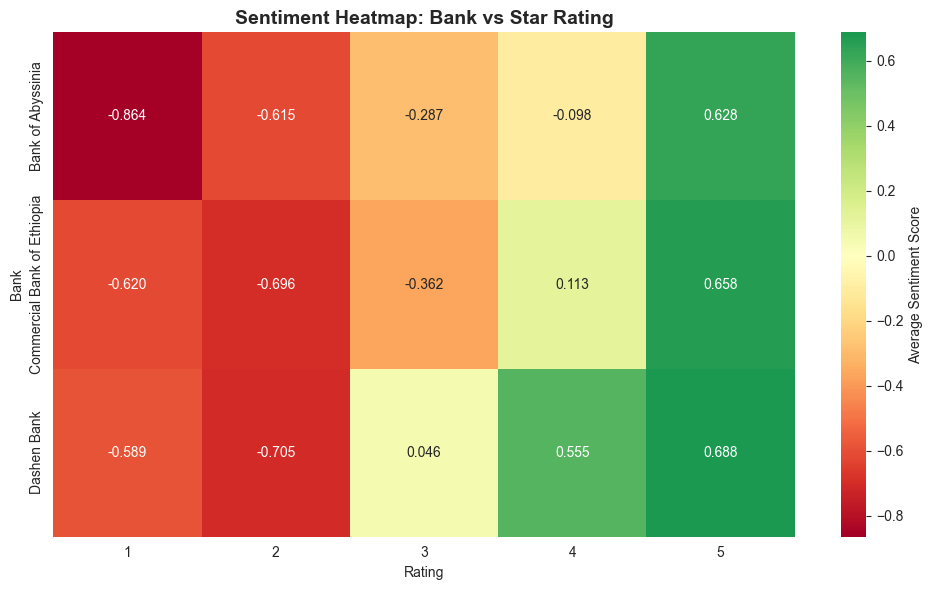

In [7]:
# Cell 6: Detailed Sentiment Analysis by Bank and Rating
print(" Performing Detailed Sentiment Breakdown...")

# Create comprehensive summary
summary_data = []

for bank in df_sentiment['bank'].unique():
    bank_data = df_sentiment[df_sentiment['bank'] == bank]
    
    for rating in sorted(bank_data['rating'].unique()):
        rating_data = bank_data[bank_data['rating'] == rating]
        
        summary_data.append({
            'Bank': bank,
            'Rating': rating,
            'Review_Count': len(rating_data),
            'Avg_Sentiment_Score': rating_data['sentiment_numeric'].mean(),
            'Positive_Pct': (rating_data['sentiment_label'] == 'POSITIVE').mean() * 100,
            'Neutral_Pct': (rating_data['sentiment_label'] == 'NEUTRAL').mean() * 100,
            'Negative_Pct': (rating_data['sentiment_label'] == 'NEGATIVE').mean() * 100
        })

# Create summary dataframe
summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.round(3)

print("📋 Detailed Sentiment Summary by Bank and Rating:")
display(summary_df)

# Create heatmap of average sentiment by bank and rating
pivot_table = summary_df.pivot(index='Bank', columns='Rating', values='Avg_Sentiment_Score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Average Sentiment Score'})
plt.title('Sentiment Heatmap: Bank vs Star Rating', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [8]:
# Cell 7: Key Insights and Business Implications
print(" Key Business Insights from Sentiment Analysis")

# Calculate overall metrics
total_reviews = len(df_sentiment)
overall_positive_pct = (df_sentiment['sentiment_label'] == 'POSITIVE').mean() * 100
overall_negative_pct = (df_sentiment['sentiment_label'] == 'NEGATIVE').mean() * 100

print(f"\n📈 Overall Sentiment Metrics:")
print(f"   Total Reviews Analyzed: {total_reviews:,}")
print(f"   Overall Positive: {overall_positive_pct:.1f}%")
print(f"   Overall Negative: {overall_negative_pct:.1f}%")

print(f"\n🏦 Bank Performance Ranking (by Average Sentiment):")
bank_ranking = df_sentiment.groupby('bank')['sentiment_numeric'].mean().sort_values(ascending=False)
for i, (bank, score) in enumerate(bank_ranking.items(), 1):
    sentiment = "👍 Positive" if score > 0.1 else "👎 Negative" if score < -0.1 else "➖ Neutral"
    print(f"   {i}. {bank}: {score:.3f} ({sentiment})")

print(f"\n⭐ Rating-Sentiment Correlation Insights:")
for rating in sorted(df_sentiment['rating'].unique()):
    rating_data = df_sentiment[df_sentiment['rating'] == rating]
    avg_sentiment = rating_data['sentiment_numeric'].mean()
    sentiment_consistency = (rating_data['sentiment_label'] == 
                           ('POSITIVE' if rating >= 4 else 'NEGATIVE' if rating <= 2 else 'NEUTRAL')).mean() * 100
    
    print(f"   ⭐{rating}: Avg sentiment {avg_sentiment:.3f}, Consistency: {sentiment_consistency:.1f}%")

print(f"\n🎯 Business Implications:")
print("   1. Identify banks with highest negative sentiment for urgent attention")
print("   2. Understand relationship between star ratings and emotional sentiment") 
print("   3. Pinpoint specific rating categories needing improvement")
print("   4. Use sentiment scores to prioritize feature development")

 Key Business Insights from Sentiment Analysis

📈 Overall Sentiment Metrics:
   Total Reviews Analyzed: 1,244
   Overall Positive: 60.5%
   Overall Negative: 38.7%

🏦 Bank Performance Ranking (by Average Sentiment):
   1. Dashen Bank: 0.391 (👍 Positive)
   2. Commercial Bank of Ethiopia: 0.311 (👍 Positive)
   3. Bank of Abyssinia: -0.038 (➖ Neutral)

⭐ Rating-Sentiment Correlation Insights:
   ⭐1: Avg sentiment -0.747, Consistency: 87.4%
   ⭐2: Avg sentiment -0.674, Consistency: 83.3%
   ⭐3: Avg sentiment -0.168, Consistency: 0.0%
   ⭐4: Avg sentiment 0.237, Consistency: 61.9%
   ⭐5: Avg sentiment 0.660, Consistency: 82.3%

🎯 Business Implications:
   1. Identify banks with highest negative sentiment for urgent attention
   2. Understand relationship between star ratings and emotional sentiment
   3. Pinpoint specific rating categories needing improvement
   4. Use sentiment scores to prioritize feature development


In [9]:
# Cell 8: Save Sentiment Analysis Results
print("💾 Saving Sentiment Analysis Results...")

# Save the sentiment-enhanced dataframe
output_path = DATA_PATHS['sentiment_results']
df_sentiment.to_csv(output_path, index=False)

print(f" Results saved to: {output_path}")
print(f"📊 File contains {len(df_sentiment):,} reviews with sentiment analysis")
print(f" Columns saved: {list(df_sentiment.columns)}")

# Verify file was saved
import os
if os.path.exists(output_path):
    saved_df = pd.read_csv(output_path)
    print(f" Verification: Loaded {len(saved_df):,} reviews from saved file")
else:
    print(" Error: File was not saved correctly")

print("\n🎉 Sentiment Analysis Complete!")
print("   Next: Proceed to Thematic Analysis for deeper insights")

💾 Saving Sentiment Analysis Results...
 Results saved to: data/processed/reviews_with_sentiment.csv
📊 File contains 1,244 reviews with sentiment analysis
 Columns saved: ['review', 'rating', 'date', 'bank', 'source', 'review_id', 'sentiment_label', 'sentiment_score', 'sentiment_numeric']
 Verification: Loaded 1,244 reviews from saved file

🎉 Sentiment Analysis Complete!
   Next: Proceed to Thematic Analysis for deeper insights


###  Sentiment Analysis Completion Summary

#### 🎯 Achieved Objectives:
-  Applied DistilBERT sentiment analysis to all reviews
-  Converted to 3-class system (POSITIVE/NEUTRAL/NEGATIVE)  
-  Aggregated results by bank and rating
-  Generated comprehensive visualizations
-  Extracted key business insights

#### 📊 Key Deliverables:
1. **Sentiment-labeled dataset** ready for thematic analysis
2. **Bank performance comparison** based on sentiment
3. **Rating-sentiment correlation** analysis
4. **Actionable insights** for product teams

#### 🚀 Next Steps:
- Proceed to `theme_analysis.ipynb` for thematic insights
- Use sentiment results to guide theme prioritization
- Combine sentiment and themes for comprehensive analysis